In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
IMG = 128           
BATCH = 32
EPOCHS = 10
NUM_CLASSES = 4     
DATA_DIR =r"C:\Users\nabon\Downloads\archive (7)\Training"

In [4]:
import os

DATASET_DIR = r"C:\Users\nabon\Downloads\archive (7)"

os.listdir(DATASET_DIR)


['Testing', 'Training']

In [5]:
train_dir = DATASET_DIR + r"\Training"
val_dir   = DATASET_DIR + r"\Testing"   
test_dir  = DATASET_DIR + r"\Testing"


In [6]:
# Create datasets with one-hot encoded labels
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG, IMG),
    batch_size=BATCH,
    label_mode='categorical'  
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG, IMG),
    batch_size=BATCH,
    label_mode='categorical'  
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Input

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D


In [10]:
base_model = MobileNetV2(
    input_shape=(IMG, IMG, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # very important


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights="imagenet"
)




In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [13]:
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 2,019,588 (7.70 MB)

 Non-trainable params: 402,880 (1.54 MB)

In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = np.concatenate([y.numpy() for _, y in train_ds])
labels = np.argmax(labels, axis=1)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels),
    y=labels
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)



Class Weights: {0: np.float64(1.0608170844939646), 1: np.float64(1.048165137614679), 2: np.float64(0.9161988773055333), 3: np.float64(0.9883217993079585)}


In [16]:

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    class_weight=class_weights
)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 272ms/step - accuracy: 0.3540 - loss: 1.5510 - val_accuracy: 0.3581 - val_loss: 1.2924
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.6753 - loss: 0.8345 - val_accuracy: 0.6007 - val_loss: 0.9661
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 255ms/step - accuracy: 0.7836 - loss: 0.6283 - val_accuracy: 0.6821 - val_loss: 0.7851
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.8163 - loss: 0.5019 - val_accuracy: 0.7373 - val_loss: 0.6586
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 305ms/step - accuracy: 0.8398 - loss: 0.4554 - val_accuracy: 0.7811 - val_loss: 0.5678
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 309ms/step - accuracy: 0.8648 - loss: 0.3890 - val_accuracy: 0.8257 - val_loss: 0.4789
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 259ms/step - accuracy: 0.8822 - loss: 0.3502 - val_accuracy: 0.8380 - val_loss: 0.4361
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 260ms/step - accuracy: 0.8898 - loss: 0

In [17]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.9482 - loss: 0.1434 - val_accuracy: 0.9194 - val_loss: 0.2178
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 254ms/step - accuracy: 0.9643 - loss: 0.1187 - val_accuracy: 0.9229 - val_loss: 0.2142
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9595 - loss: 0.1196 - val_accuracy: 0.9212 - val_loss: 0.2166
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 260ms/step - accuracy: 0.9659 - loss: 0.1034 - val_accuracy: 0.9343 - val_loss: 0.1990
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 312ms/step - accuracy: 0.9782 - loss: 0.0811 - val_accuracy: 0.9299 - val_loss: 0.2026


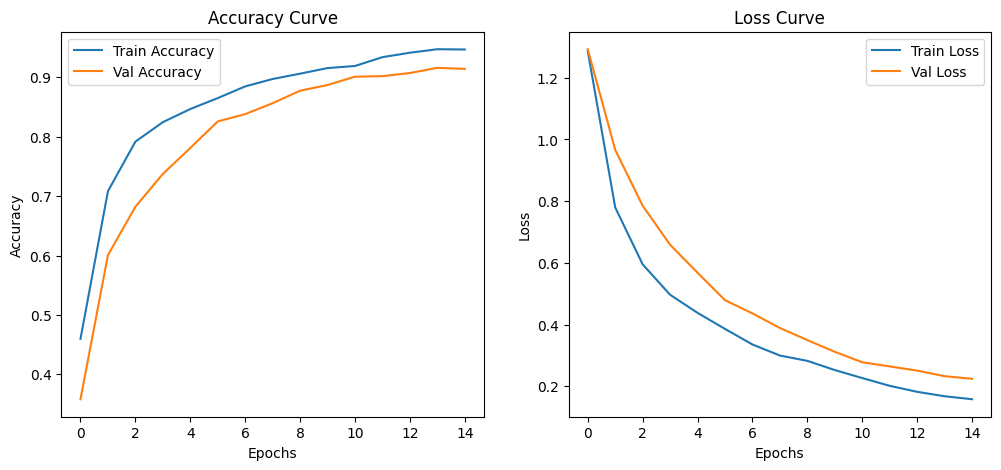

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
#Accuarcy 
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label ='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)
y_true = np.argmax(y_true, axis=1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step
[[ 47  43  93  61]
 [ 49  54  69  77]
 [ 73  77 106  92]
 [ 62  59  94  86]]
              precision    recall  f1-score   support

           0       0.20      0.19      0.20       244
           1       0.23      0.22      0.22       249
           2       0.29      0.30      0.30       348
           3       0.27      0.29      0.28       301

    accuracy                           0.26      1142
   macro avg       0.25      0.25      0.25      1142
weighted avg       0.25      0.26      0.26      1142



In [20]:
TUMOR_CONF_THRESHOLD = 70    # % needed to say tumor
NO_TUMOR_THRESHOLD   = 50    # % needed to say no tumor


In [23]:
# ---------- IMAGE PREPROCESS ----------
img_path = r"C:\Users\nabon\OneDrive\Pictures\Te-no_0012.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ---------- PREDICTION ----------
pred = model.predict(img_array)
probs = pred[0]   # convert (1,n) → (n,)

# ---------- CLASS INFO ----------
class_names = train_ds.class_names
notumor_index = class_names.index("notumor")

notumor_prob = probs[notumor_index] * 100
best_index = np.argmax(probs)
best_class = class_names[best_index]
best_prob = probs[best_index] * 100

print(" Analysis Result")

# ---------- DECISION LOGIC ----------
if best_class == "notumor":
    print("✅ Tumor Status : NO TUMOR DETECTED")
    print(f"📊 Confidence   : {best_prob:.2f}%")

else:
    print("⚠ Tumor Status : TUMOR DETECTED")
    print(f"🧠 Tumor Type  : {best_class.upper()}")
    print(f"📊 Confidence  : {best_prob:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
 Analysis Result
✅ Tumor Status : NO TUMOR DETECTED
📊 Confidence   : 59.90%


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np


class_names = train_ds.class_names


img_path = r"C:\Users\nabon\Downloads\c0472761-800px-wm.jpg"


img = image.load_img(img_path, target_size=(IMG, IMG))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)
predicted_index = np.argmax(pred)
predicted_class = class_names[predicted_index]
confidence = pred[0][predicted_index] * 100

print(" Analysis Result")

if predicted_class == "no_tumor":
    print("✅ Tumor Status : NO TUMOR DETECTED")
else:
    print("⚠️ Tumor Status : TUMOR DETECTED")
    print(f"🧠 Tumor Type   : {predicted_class.upper()}")

print(f"📊 Confidence   : {confidence:.2f}%")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
 Analysis Result
⚠️ Tumor Status : TUMOR DETECTED
🧠 Tumor Type   : MENINGIOMA
📊 Confidence   : 61.39%


In [27]:
class_names = train_ds.class_names


img_path = r"C:\Users\nabon\Downloads\OIP (3).webp"
img = image.load_img(img_path, target_size=(IMG, IMG))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)
predicted_index = np.argmax(pred)
predicted_class = class_names[predicted_index]
confidence = pred[0][predicted_index] * 100


print("Analysis Result")

if predicted_class == "no_tumor":
    print("✅ Tumor Status : NO TUMOR DETECTED")
else:
    print("⚠️ Tumor Status : TUMOR DETECTED")
    print(f"🧠 Tumor Type   : {predicted_class.upper()}")

print(f"📊 Confidence   : {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Analysis Result
⚠️ Tumor Status : TUMOR DETECTED
🧠 Tumor Type   : MENINGIOMA
📊 Confidence   : 64.92%


In [28]:
model.save("brain_tumor_classifier_mobilenet.keras")
